In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

/var/folders/0s/qx660n5s6f586m8xdh3hj1w80000gn/T/ipykernel_2891/3490870808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Thai.fillna(0, inplace=True)
/var/folders/0s/qx660n5s6f586m8xdh3hj1w80000gn/T/ipykernel_2891/3490870808.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Thai['date'] = pd.to_datetime(df_Thai['date'])


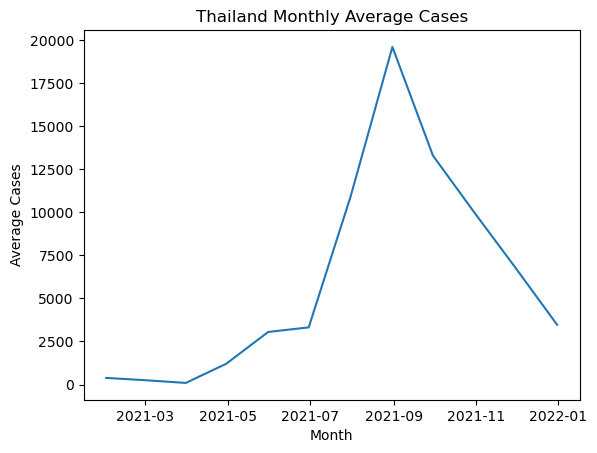

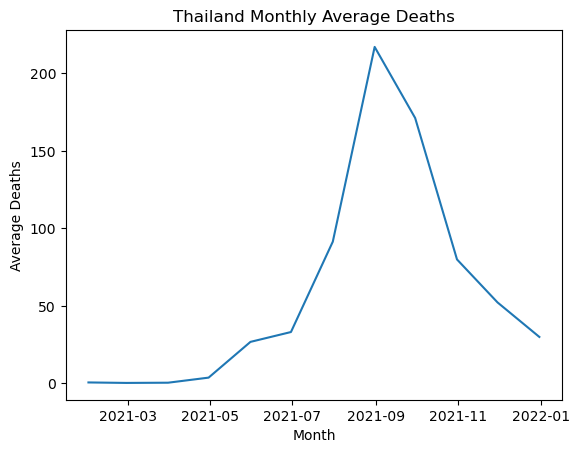

In [4]:
#---------------------------------------------考試填寫部分------------------------------------------------
df = pd.read_csv('owid-covid-data.csv')
df = df.loc[:, ['location','date','new_cases','new_deaths']]
df_Thai=df[df['location'] == 'Thailand']
df_Thai.fillna(0, inplace=True)

df_Thai['date'] = pd.to_datetime(df_Thai['date'])
#抓出2021年資料（平均案例和平均死亡人數）
df_2021 = df_Thai[(df_Thai['date'] >= '2021-01-01') & (df_Thai['date'] < '2022-01-01')]
monthly_avg_case = df_2021.groupby(pd.Grouper(key='date', freq='M'))['new_cases'].mean().round(2)
monthly_avg_death = df_2021.groupby(pd.Grouper(key='date', freq='M'))['new_deaths'].mean().round(2)

#--------------------------------------------------------------------------------------------------------
# 設置Thailand Monthly Average Cases圖
plt.plot(monthly_avg_case)
plt.title('Thailand Monthly Average Cases')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.show()


# 設置Thailand Monthly Average Deaths圖
plt.plot(monthly_avg_death)
plt.title('Thailand Monthly Average Deaths')
plt.xlabel('Month')
plt.ylabel('Average Deaths')
plt.show()


/Users/yizhenxie/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yizhenxie/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yizhenxie/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yizhenxie/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yizhenxie/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency inform

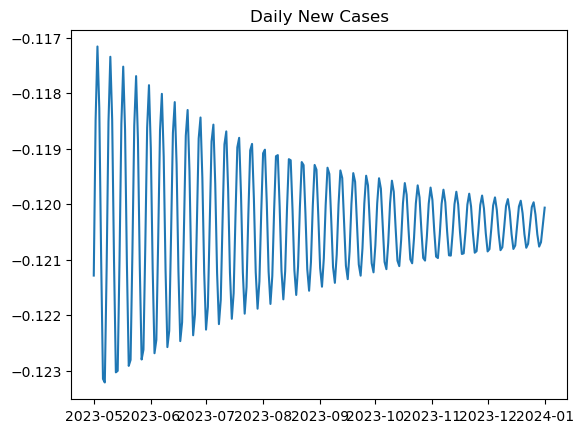

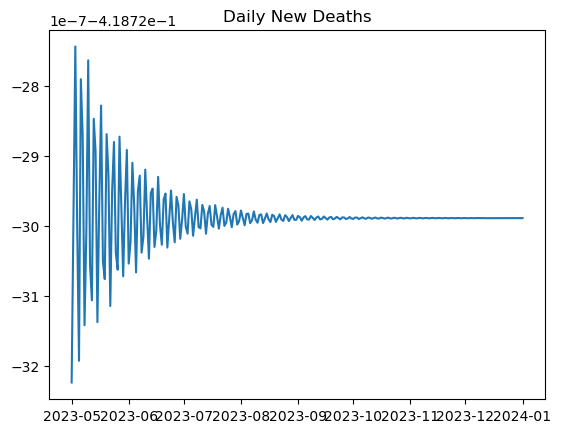

In [6]:
#------------------------------------考試填寫部分---------------------------------------------
# 讀入數據，並將date欄值設為index
df_new=df_Thai.copy()
df_new.set_index('date', inplace=True)

# 計算Z-score(單筆資料-資料平均值)/標準差  計算mean平均值和標準差
mean = np.mean(df_new[['new_cases', 'new_deaths']], axis=0)
std = np.std(df_new[['new_cases', 'new_deaths']], axis=0, ddof=1)

# 計算Z-score
z_score = (df_new[['new_cases', 'new_deaths']] - mean) / std

df_new['new_cases'] = z_score['new_cases']
df_new['new_deaths'] = z_score['new_deaths']


train = df_new.loc[:'2022-06-30', ['new_cases', 'new_deaths']]
test = df_new.loc['2022-07-01':, ['new_cases', 'new_deaths']]

#-----------------------------------------------------------------------------------------------
# 建立ARIMA模型，並用訓練集擬合模型
model_case = ARIMA(train['new_cases'], order=(25, 1, 1))
model_death = ARIMA(train['new_deaths'], order=(25, 1, 1))
results_case = model_case.fit()
results_death = model_death.fit()

# 預測資料
case_pred = results_case.predict(start='2023-05-01', end='2024-01-01', typ='levels')
death_pred = results_death.predict(start='2023-05-01', end='2024-01-01', typ='levels')


# 繪製預測結果
plt.plot(case_pred, label='Predicted')
plt.title('Daily New Cases')
plt.show()

plt.plot(death_pred, label='Predicted')
plt.title('Daily New Deaths')
plt.show()